In [41]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
ticker = "AAPL"
df = yf.download(ticker,start="2020-01-01",end="2025-01-01")
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.468262   72.528582   71.223259   71.476600  135480400
2020-01-03   71.763710   72.523738   71.539322   71.696152  146322800
2020-01-06   72.335548   72.374154   70.634532   70.885464  118387200
2020-01-07   71.995369   72.600975   71.775804   72.345220  108872000
2020-01-08   73.153503   73.455103   71.698589   71.698589  132079200
...                ...         ...         ...         ...        ...
2024-12-24  257.037476  257.047410  254.140559  254.339671   23234700
2024-12-26  257.853760  258.928914  256.470034  257.027510   27237100
2024-12-27  254.439240  257.535253  251.920632  256.669145   42355300
2024-12-30  251.064499  252.358649  249.621030  251.094363   35557500
2024-12-31  249.292496  252.139619  248.306948  251.303405   39480700

[1258 rows x 5 colu

In [43]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763710,72.523738,71.539322,71.696152,146322800
2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000
2020-01-08,73.153503,73.455103,71.698589,71.698589,132079200


In [44]:
df = df[['Open','High','Low','Volume','Close']]
df.dropna(inplace=True)

In [45]:
df.head()

Price,Open,High,Low,Volume,Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,71.476600,72.528582,71.223259,135480400,72.468262
2020-01-03,71.696152,72.523738,71.539322,146322800,71.763710
2020-01-06,70.885464,72.374154,70.634532,118387200,72.335548
2020-01-07,72.345220,72.600975,71.775804,108872000,71.995369
2020-01-08,71.698589,73.455103,71.698589,132079200,73.153503


In [46]:
df['Next_Close']= df['Close'].shift(-1)
df.dropna(inplace=True)

In [47]:
X = df[["Open","High","Low","Volume"]]
y = df['Next_Close']

In [48]:
split=int(len(df)*0.8)
X_train , X_test = X[:split],X[split:]
Y_train, Y_test  = y[:split],y[split:]


In [49]:
models = {
    'LinearRegression' : LinearRegression(),
    'RandomForestRegressor' : RandomForestRegressor() 
}

result = []

for name,model in models.items():
    model.fit(X_train,Y_train)
    lr_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test,lr_pred))
    r2 = r2_score(Y_test,lr_pred)
    result.append({
        'Model': name,
        'RMSE': round(rmse, 4),
        'R2_Score': round(r2, 4)
    })

result


[{'Model': 'LinearRegression', 'RMSE': np.float64(3.1045), 'R2_Score': 0.9852},
 {'Model': 'RandomForestRegressor',
  'RMSE': np.float64(25.9551),
  'R2_Score': -0.0321}]

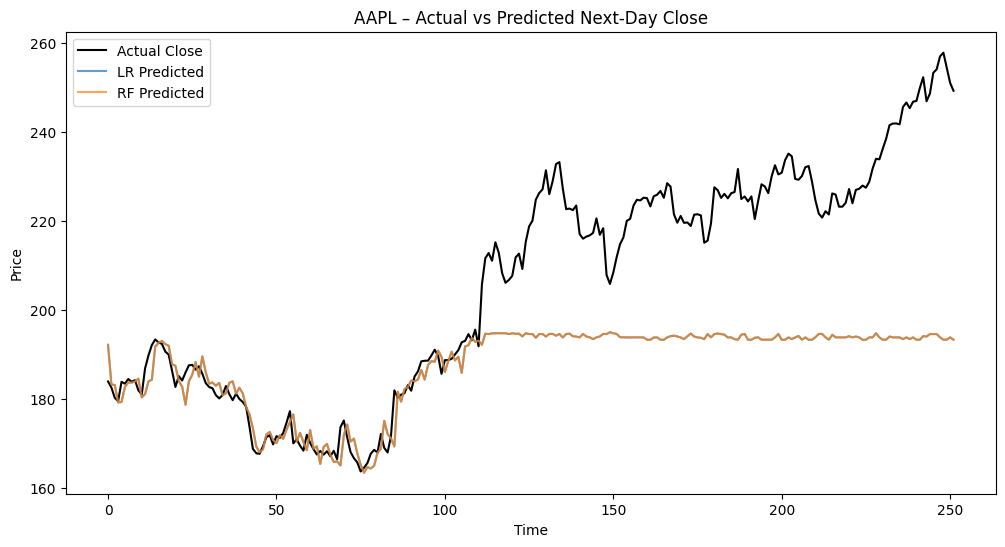

In [50]:
plt.figure(figsize=(12,6))
plt.plot(Y_test.values, label='Actual Close', color='black')
plt.plot(lr_pred, label='LR Predicted', alpha=0.7)
plt.plot(lr_pred, label='RF Predicted', alpha=0.7)
plt.title(f"{ticker} – Actual vs Predicted Next-Day Close")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [51]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)


In [54]:
df

Price,Open,High,Low,Volume,Close,Next_Close,Close_Lag1,Close_Lag2
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2020-01-02,71.476600,72.528582,71.223259,135480400,72.468262,71.763710,NaN,NaN
2020-01-03,71.696152,72.523738,71.539322,146322800,71.763710,72.335548,72.468262,NaN
2020-01-06,70.885464,72.374154,70.634532,118387200,72.335548,71.995369,71.763710,72.468262
2020-01-07,72.345220,72.600975,71.775804,108872000,71.995369,73.153503,72.335548,71.763710
2020-01-08,71.698589,73.455103,71.698589,132079200,73.153503,74.707329,71.995369,72.335548
...,...,...,...,...,...,...,...,...
2024-12-23,253.622918,254.498945,252.308854,40858800,254.120667,257.037476,253.344193,248.665329
2024-12-24,254.339671,257.047410,254.140559,23234700,257.037476,257.853760,254.120667,253.344193
